In [196]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 

In [197]:
# Read in the data
df = pd.read_csv('papers_data.csv', names =['date', 'title', 'abstract','categories'])
df

,date,title,abstract,categories
0,2024-03-06,Stop Regressing: Training Value Functions via ...,Value functions are a central component of dee...,"cs.LG, cs.AI, stat.ML"
1,2024-03-06,Reconciling Reality through Simulation: A Real...,Imitation learning methods need significant hu...,"cs.RO, cs.AI, cs.LG"
2,2024-03-06,Demographic Dynamics and Artificial Intelligen...,This paper explores the complex relationship b...,"cs.CY, K.4"
3,2024-03-06,Extreme Precipitation Nowcasting using Transfo...,This paper presents an innovative approach to ...,"cs.LG, cs.AI"
4,2024-03-06,Consciousness qua Mortal Computation,Computational functionalism posits that consci...,"q-bio.NC, cs.AI"
...,...,...,...,...
35595,2022-03-30,Machine Learning Approaches for Non-Intrusive ...,Home absence detection is an emerging field on...,"cs.LG, cs.AI, cs.NE, eess.SP"
35596,2022-03-30,Near-Field Communications for 6G: Fundamentals...,Extremely large antenna array (ELAA) is a comm...,"cs.IT, eess.SP, math.IT"
35597,2022-03-30,PseCo: Pseudo Labeling and Consistency Trainin...,"In this paper, we delve into two key technique...","cs.CV, cs.AI"
35598,2022-03-30,Dual Temperature Helps Contrastive Learning Wi...,Contrastive learning (CL) is widely known to r...,"cs.LG, cs.AI"


# EDA

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35600 entries, 0 to 35599
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        35600 non-null  object
 1   title       35600 non-null  object
 2   abstract    35600 non-null  object
 3   categories  35600 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [199]:
df.isnull().sum()

date          0
title         0
abstract      0
categories    0
dtype: int64

In [200]:
df['date'] = pd.to_datetime(df['date'])

In [201]:
# Split date columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

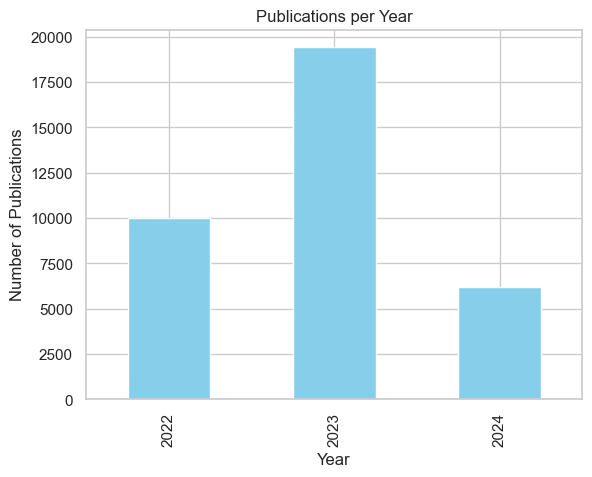

In [202]:
# Count the number of publications each year
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

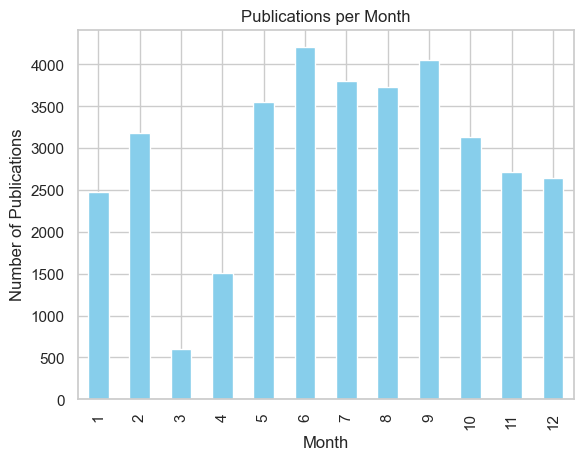

In [203]:
# Count the number of publications each month
df['month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Publications per Month')
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.show()

In [204]:
# Create a mapping for the categories that need to be replaced.
replacement_mapping = {
    'cs.AI': 'Artificial Intelligence',
    'cs.LG': 'Machine Learning',
    'cs.CV': 'Computer Vision and Pattern Recognition',
    'cs.CL': 'Computation and Language',
    'cs.HC': 'Human-Computer Interaction',
    'cs.CY': 'Computers and Society',
    'cs.RO': 'Robotics',
    'stat.ML': 'Machine Learning (Statistics)',
    'cs.NE': 'Neural and Evolutionary Computing',
    'cs.CR': 'Cryptography and Security',
    'cs.SY': 'Systems and Control',
    'eess.SY': 'Systems and Control (Electrical Engineering and Systems Science)',
    'eess.SP': 'Signal Processing',
    'cs.IR': 'Information Retrieval',
    'cs.MA': 'Multiagent Systems',
    'eess.IV': 'Image and Video Processing',
    'cs.DC': 'Distributed, Parallel, and Cluster Computing',
    'eess.AS': 'Audio and Speech Processing',
    'math.IT' : 'Information Theory',
    'cs.IT' : 'Information Theory',
    'cs.SE' : 'Software Engineering',
    'cs.SD' : 'Sound',
}

# Create a function to update the selected categories
def update_selected_categories(df):
    def replace_selected(category_string):
        split_categories = category_string.replace(';', ',').split(',')
        updated_categories = [replacement_mapping.get(cat.strip(), cat.strip()) for cat in split_categories]
        return ', '.join(updated_categories)

    # Apply the function to each row in the 'categories' column
    df['categories'] = df['categories'].apply(replace_selected)
    return df

# Applying the update function to the mock DataFrame 
df = update_selected_categories(df)
df

,date,title,abstract,categories,year,month,day
0,2024-03-06,Stop Regressing: Training Value Functions via ...,Value functions are a central component of dee...,"Machine Learning, Artificial Intelligence, Mac...",2024,3,6
1,2024-03-06,Reconciling Reality through Simulation: A Real...,Imitation learning methods need significant hu...,"Robotics, Artificial Intelligence, Machine Lea...",2024,3,6
2,2024-03-06,Demographic Dynamics and Artificial Intelligen...,This paper explores the complex relationship b...,"Computers and Society, K.4",2024,3,6
3,2024-03-06,Extreme Precipitation Nowcasting using Transfo...,This paper presents an innovative approach to ...,"Machine Learning, Artificial Intelligence",2024,3,6
4,2024-03-06,Consciousness qua Mortal Computation,Computational functionalism posits that consci...,"q-bio.NC, Artificial Intelligence",2024,3,6
...,...,...,...,...,...,...,...
35595,2022-03-30,Machine Learning Approaches for Non-Intrusive ...,Home absence detection is an emerging field on...,"Machine Learning, Artificial Intelligence, Neu...",2022,3,30
35596,2022-03-30,Near-Field Communications for 6G: Fundamentals...,Extremely large antenna array (ELAA) is a comm...,"Information Theory, Signal Processing, Informa...",2022,3,30
35597,2022-03-30,PseCo: Pseudo Labeling and Consistency Trainin...,"In this paper, we delve into two key technique...","Computer Vision and Pattern Recognition, Artif...",2022,3,30
35598,2022-03-30,Dual Temperature Helps Contrastive Learning Wi...,Contrastive learning (CL) is widely known to r...,"Machine Learning, Artificial Intelligence",2022,3,30


In [205]:
from collections import Counter

# Initialize an empty list for categories
categories = []

## Seperate the categories for counting

for category_string in df['categories']:
    split_categories = category_string.replace(';', ',').split(', ')
    categories.extend(split_categories)

# Remove the unwanted categories since they are not standard ArXiv categories
categories = [category for category in categories if category not in ['I.2.7', 'I.2.6']]


In [206]:
df['categories']

0        Machine Learning, Artificial Intelligence, Mac...
1        Robotics, Artificial Intelligence, Machine Lea...
2                               Computers and Society, K.4
3                Machine Learning, Artificial Intelligence
4                        q-bio.NC, Artificial Intelligence
                               ...                        
35595    Machine Learning, Artificial Intelligence, Neu...
35596    Information Theory, Signal Processing, Informa...
35597    Computer Vision and Pattern Recognition, Artif...
35598            Machine Learning, Artificial Intelligence
35599                              Artificial Intelligence
Name: categories, Length: 35600, dtype: object

In [207]:
# Count the occurrences of each category
categories_count = Counter(categories)

# Print the count of each category
print(categories_count)

Counter({'Artificial Intelligence': 27543, 'Machine Learning': 15455, 'Computation and Language': 7222, 'Computer Vision and Pattern Recognition': 7128, 'Robotics': 2471, 'Information Theory': 1688, 'Human-Computer Interaction': 1591, 'Signal Processing': 1561, 'Computers and Society': 1477, 'Cryptography and Security': 1419, 'Machine Learning (Statistics)': 1247, 'Information Retrieval': 1101, 'Systems and Control': 971, 'Systems and Control (Electrical Engineering and Systems Science)': 960, 'Neural and Evolutionary Computing': 947, 'Audio and Speech Processing': 906, 'Software Engineering': 784, 'Image and Video Processing': 783, 'Sound': 775, 'Multiagent Systems': 635, 'cs.NI': 632, 'Distributed': 570, 'Parallel': 570, 'and Cluster Computing': 570, 'cs.SI': 506, 'cs.MM': 448, 'math.OC': 427, 'cs.LO': 392, 'quant-ph': 375, 'q-bio.NC': 362, 'cs.GT': 334, 'cs.DB': 321, 'cs.GR': 274, 'q-bio.QM': 270, 'stat.ME': 270, 'cs.CE': 254, 'cs.AR': 238, 'I.2': 228, 'cs.NA': 227, 'math.NA': 227, 

In [208]:
category_df = pd.DataFrame(categories_count.most_common(20), columns=['category', 'count'])
category_df

,category,count
0,Artificial Intelligence,27543
1,Machine Learning,15455
2,Computation and Language,7222
3,Computer Vision and Pattern Recognition,7128
4,Robotics,2471
5,Information Theory,1688
6,Human-Computer Interaction,1591
7,Signal Processing,1561
8,Computers and Society,1477
9,Cryptography and Security,1419


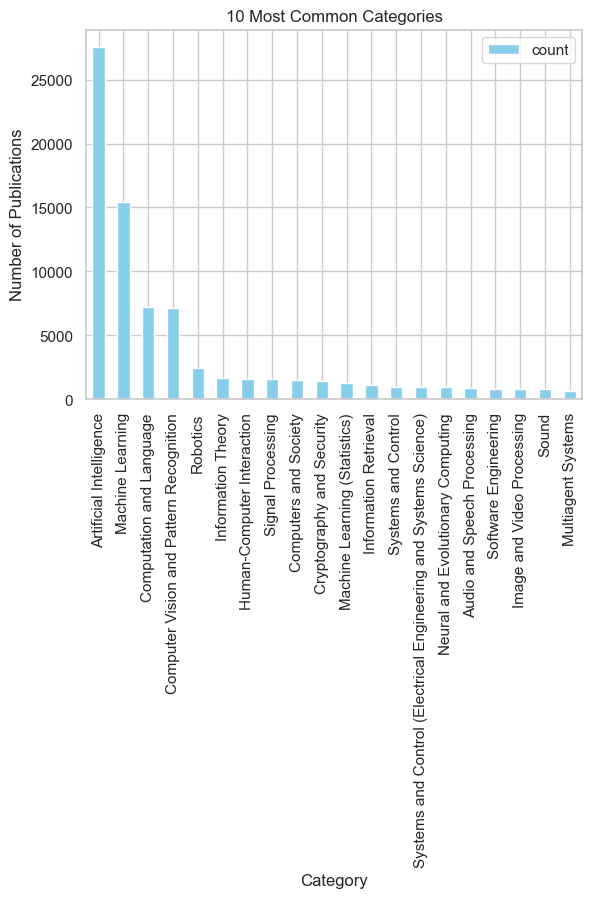

In [209]:
# Visualise the 20 most common categories
fig, ax = plt.subplots()
category_df.plot(kind='bar', x='category', y='count', ax=ax, color='skyblue')
plt.title('10 Most Common Categories')
plt.xlabel('Category')
plt.ylabel('Number of Publications')
plt.show()

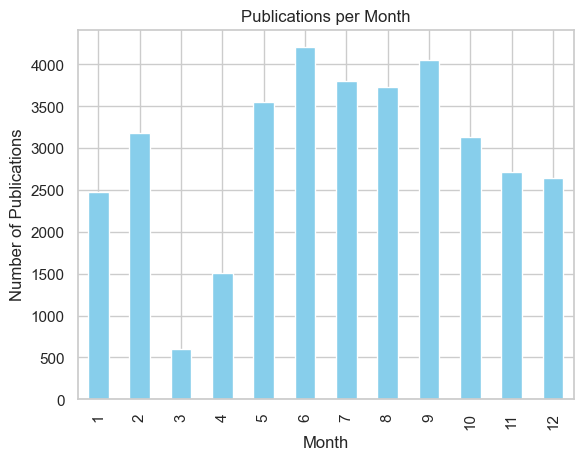

In [210]:
# Count the number of publications each month
df['month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Publications per Month')
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.show()

In [211]:
# Select the top 10 categories based on 'count'
top_categories = category_df.nlargest(10, 'count')['category']

# Initialize the time_series_data DataFrame
time_series_data = pd.DataFrame()

# Loop through the top categories
for category in top_categories:
    df_filtered = df[df['categories'].str.contains(category, regex=False)]
    df_filtered = df_filtered.set_index('date')
    time_series = df_filtered['categories'].resample('M').count()
    time_series_data[category] = time_series


print(time_series_data.head())

            Artificial Intelligence  Machine Learning  \
date                                                    
2022-03-31                       61                42   
2022-04-30                     1089               624   
2022-05-31                     1431               923   
2022-06-30                     1361               943   
2022-07-31                     1182               751   

            Computation and Language  Computer Vision and Pattern Recognition  \
date                                                                            
2022-03-31                        15                                       29   
2022-04-30                       260                                      314   
2022-05-31                       343                                      380   
2022-06-30                       185                                      396   
2022-07-31                       157                                      425   

            Robotics  Informatio

/var/folders/z3/v1bmfxr91r7bcs5hfy_6jjf00000gn/T/ipykernel_29371/1144335069.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = df_filtered['categories'].resample('M').count()
/var/folders/z3/v1bmfxr91r7bcs5hfy_6jjf00000gn/T/ipykernel_29371/1144335069.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = df_filtered['categories'].resample('M').count()
/var/folders/z3/v1bmfxr91r7bcs5hfy_6jjf00000gn/T/ipykernel_29371/1144335069.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = df_filtered['categories'].resample('M').count()
/var/folders/z3/v1bmfxr91r7bcs5hfy_6jjf00000gn/T/ipykernel_29371/1144335069.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = df_filtered['categories'].resample('M').count()
/var/folders/z3/

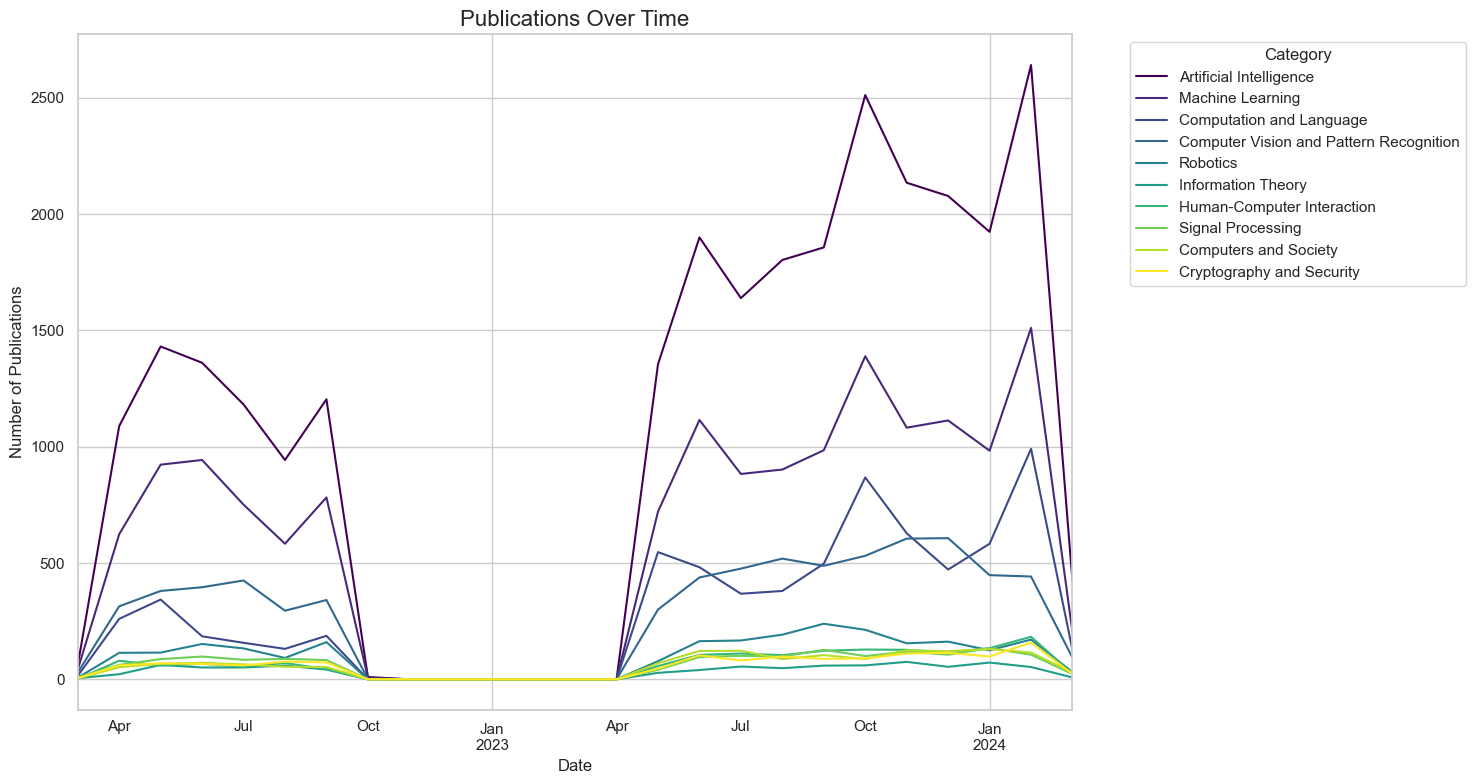

In [212]:
# Plot the time series data
categories = time_series_data.columns
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
fig, ax = plt.subplots(figsize=(15, 8)) 
time_series_data.plot(ax=ax, color=colors)

plt.title('Publications Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()


# Text processing

In [213]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    tokens = text.split()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(processed_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nghminhtthu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nghminhtthu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [214]:
# Apply the clean function to both 'abstract' and 'title' columns
df['title'] = df['title'].apply(preprocess_text)
df['abstract'] = df['abstract'].apply(preprocess_text)


In [215]:
excluded_tokens = {'artificial', 
                   'intelligence', 
                   'artificial intelligence', 'use', 'approach', 'learn', 'model', 'base',
                   'learn', 'research', 'use', 'task', 'performance',
                   'problem', 'method', 'result', 'approach', 'time', 'paper', 'system', 'network',
                   'field', 'study', 'dataset', 'industry', 'knowledge','assit'}

import spacy

# Must run this to download model: python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

def clean_and_tokenise(text):
    doc = nlp(text)
    # Generate a list of tokens that are not connective/prepositional words
    tokens = [token.lemma_.lower() for token in doc if token.pos_ not in ['CONJ', 'SCONJ', 'ADP', 'CCONJ']]
    tokens = [token for token in tokens if not token.isdigit()]
    tokens = [token for token in tokens if token not in nlp.Defaults.stop_words and token not in excluded_tokens and len(token) > 2]
    return tokens


df['tokens'] = df['title'].apply(clean_and_tokenise)


# Extract tokens

/var/folders/z3/v1bmfxr91r7bcs5hfy_6jjf00000gn/T/ipykernel_29371/1438184300.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_tokens_per_category = top_tokens_counts.groupby('categories').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)


No data to plot for category: Information Theory


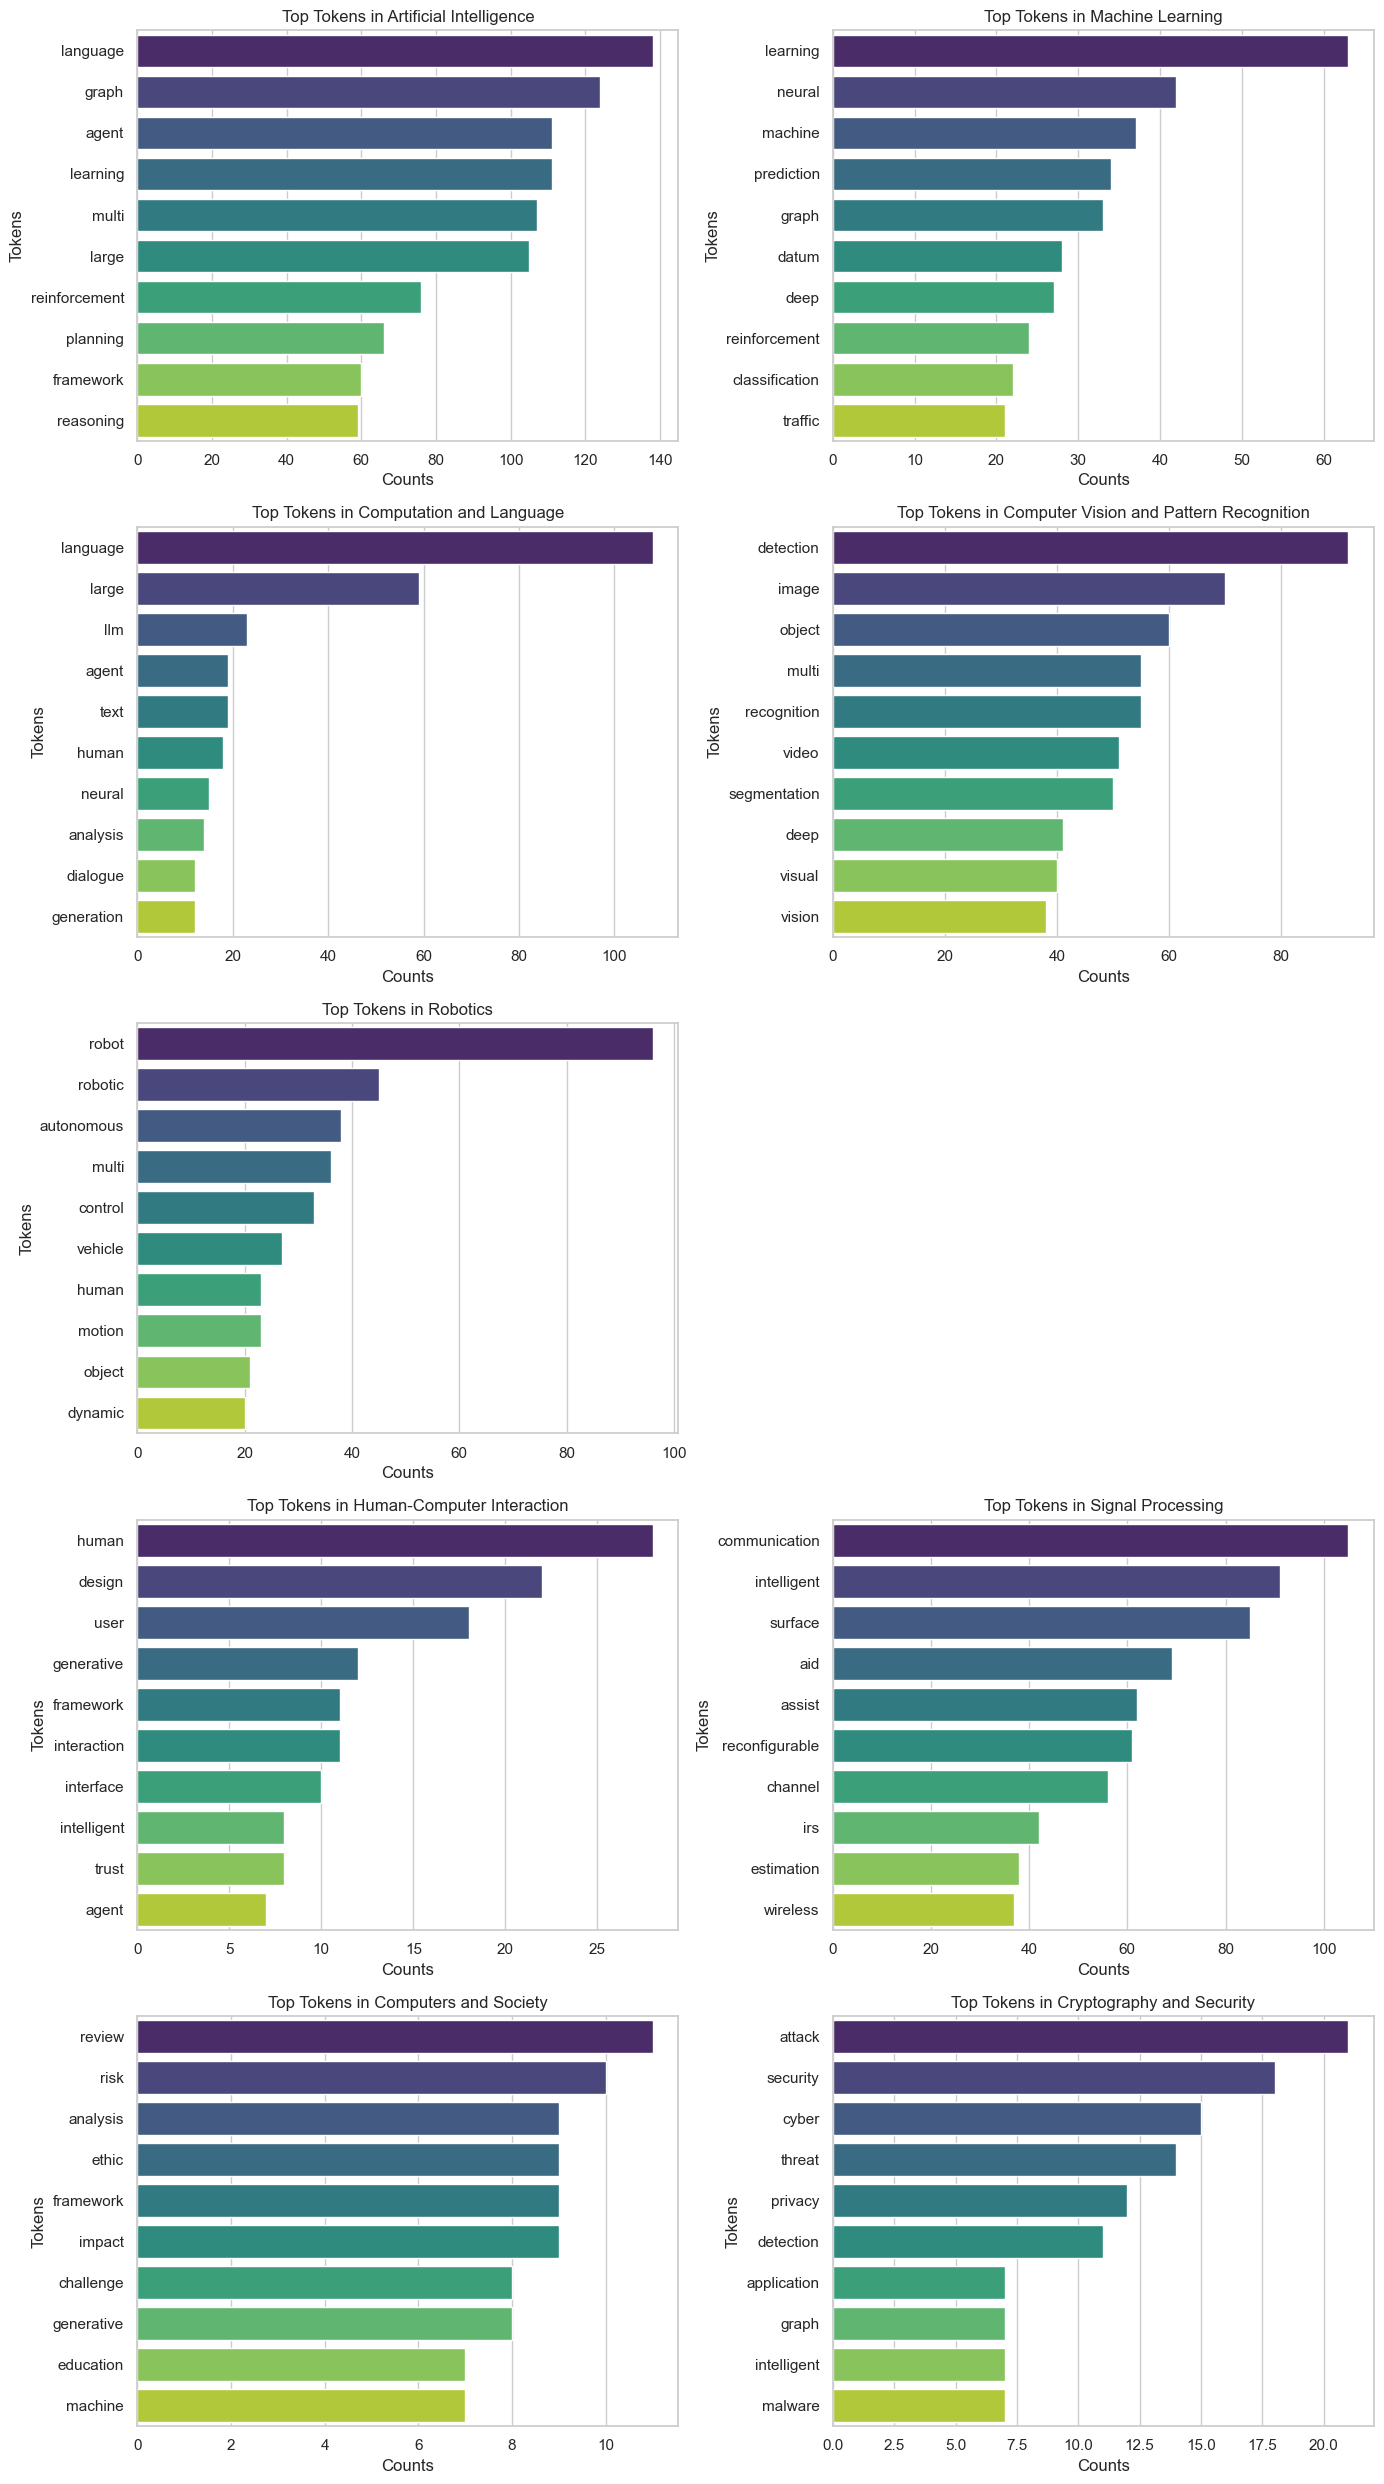

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the main DataFrame to include only the top categories
top_tokens_df = df[df['categories'].isin(top_categories)]

# Explode tokens
top_tokens_df = top_tokens_df.explode('tokens')

# Get the counts of the top tokens per category
top_tokens_counts = top_tokens_df.groupby(['categories', 'tokens']).size().reset_index(name='counts')

# Get the top 10 tokens for each top category
top_tokens_per_category = top_tokens_counts.groupby('categories').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)

# Plotting
num_rows = len(top_categories) // 2 + len(top_categories) % 2
plt.figure(figsize=(14, num_rows * 5))
sns.set(style="whitegrid")

for i, category in enumerate(top_categories, 1):
    subset = top_tokens_per_category[top_tokens_per_category['categories'] == category]
    
    # Check if subset is not empty
    if not subset.empty:
        plt.subplot(num_rows, 2, i)
        sns.barplot(x='counts', y='tokens', data=subset, palette='viridis')
        plt.title(f'Top Tokens in {category}')
        plt.xlabel('Counts')
        plt.ylabel('Tokens')
    else:
        print(f"No data to plot for category: {category}")

plt.tight_layout()
plt.show()

# Bigrams

In [218]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams

# Remove bigrams that are not useful
exclude_bigrams = set(['real world', 'github com', 'artifical intelligence', 'model based', 'learning model', 
                       'experimental result', 'learning based','state art', 'artificial intelligence', 'paper present', 'proposed method',
                       'phase shift', 'available http', 'result show','http github'])

def clean_and_2gram(text, n=2, exclude_bg=exclude_bigrams):
    # Return an empty list if text is not a string
    if not isinstance(text, str):
        return []

    # Clean the text by removing non-alphabetic characters and converting to lower case
    clean_text = re.sub(r'\W+', ' ', text).lower()
    # Tokenize the cleaned text
    tokens = word_tokenize(clean_text)
    # Set up a list of stop words
    stop_words = set(stopwords.words('english'))
    # Filter out stop words and words with length <= 2
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # Generate bigrams
    generated_bigrams = ngrams(tokens, n)
    # Filter out unwanted bigrams
    filtered_bigrams = [' '.join(bg) for bg in generated_bigrams if ' '.join(bg) not in exclude_bg]
    
    return filtered_bigrams

# Apply the function to the 'abstract' column
df['2grams'] = df['abstract'].apply(lambda x: clean_and_2gram(x))

/var/folders/z3/v1bmfxr91r7bcs5hfy_6jjf00000gn/T/ipykernel_29371/1972008904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papers['bigrams'] = papers['abstract'].apply(clean_and_2gram)
/var/folders/z3/v1bmfxr91r7bcs5hfy_6jjf00000gn/T/ipykernel_29371/1972008904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papers['bigrams'] = papers['abstract'].apply(clean_and_2gram)
/var/folders/z3/v1bmfxr91r7bcs5hfy_6jjf00000gn/T/ipykernel_29371/1972008904.py:9: SettingWithCopyWarning: 
A value is trying to be s

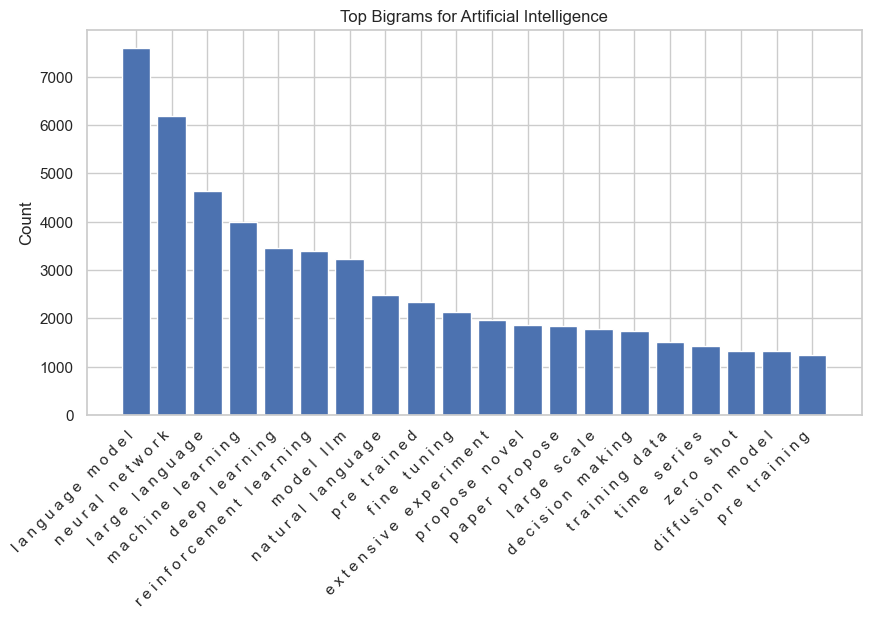

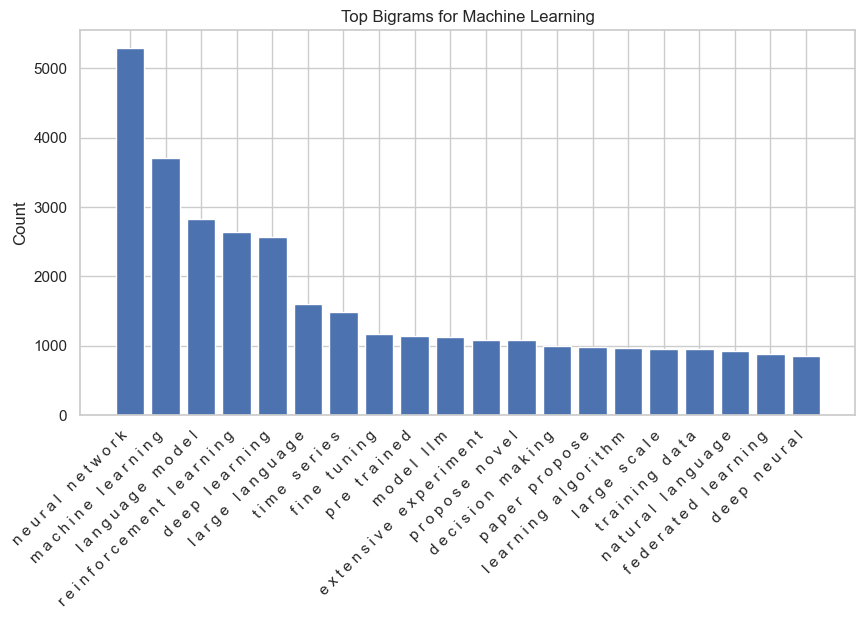

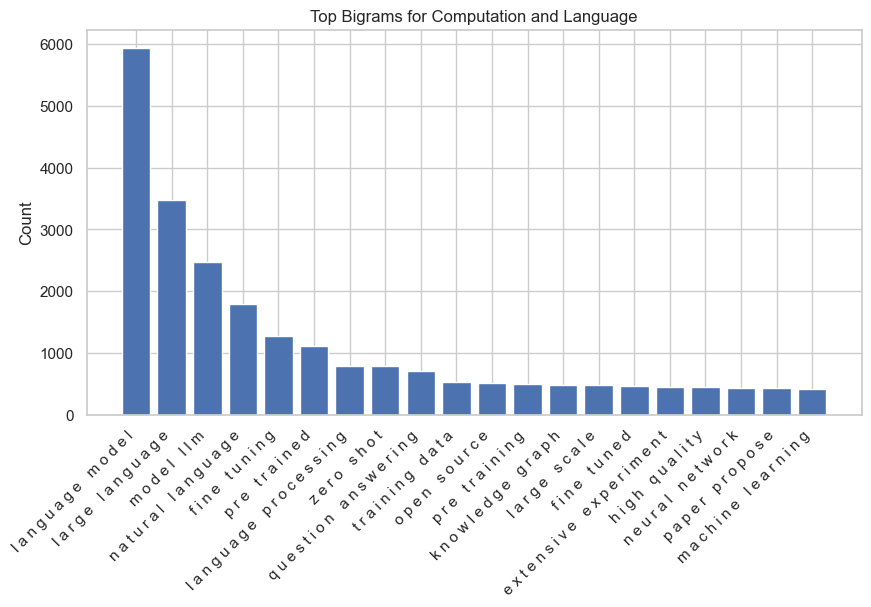

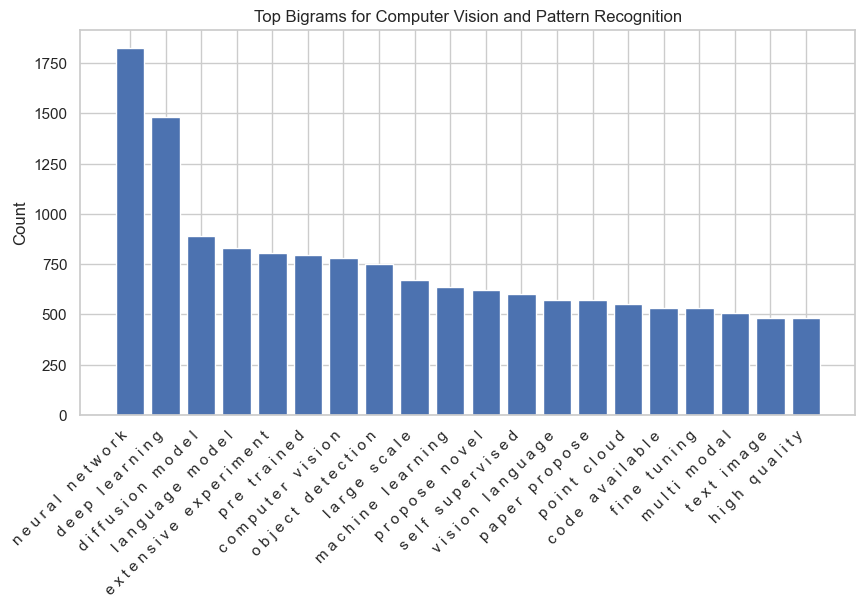

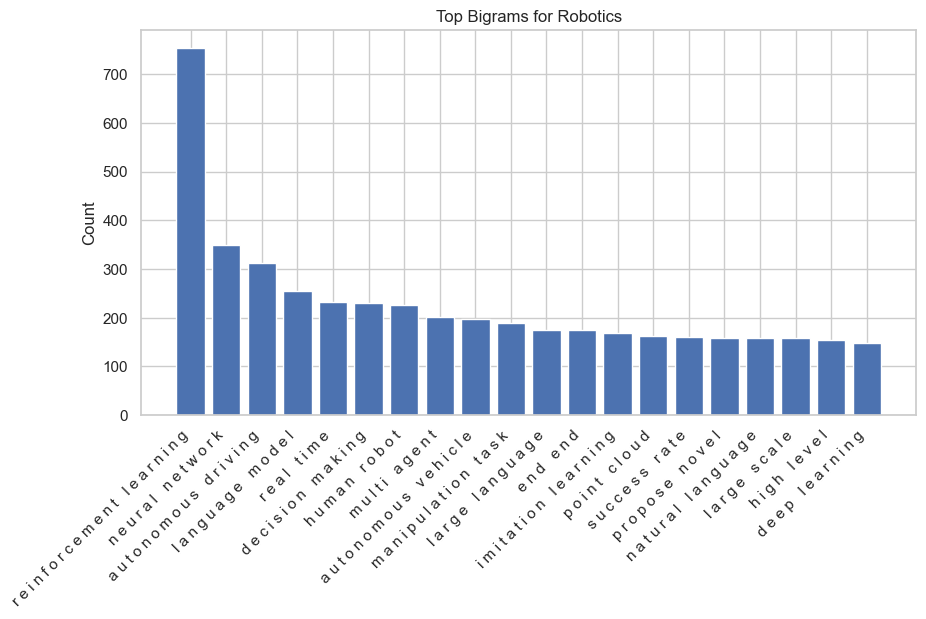

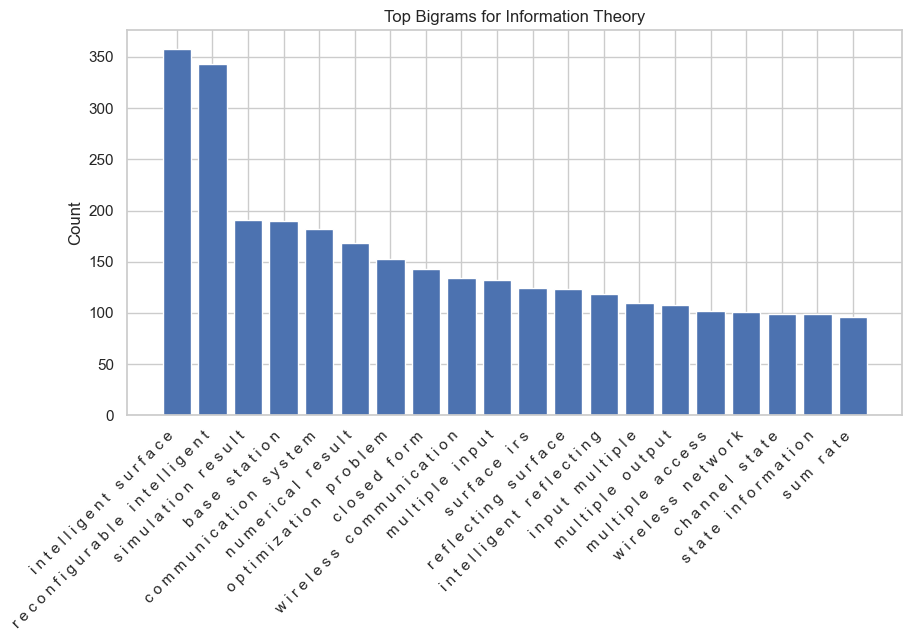

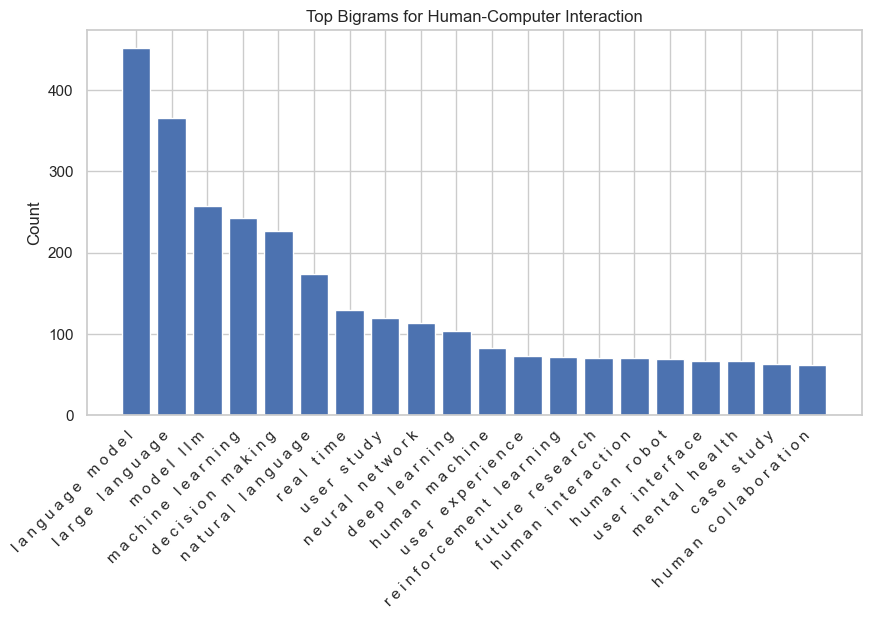

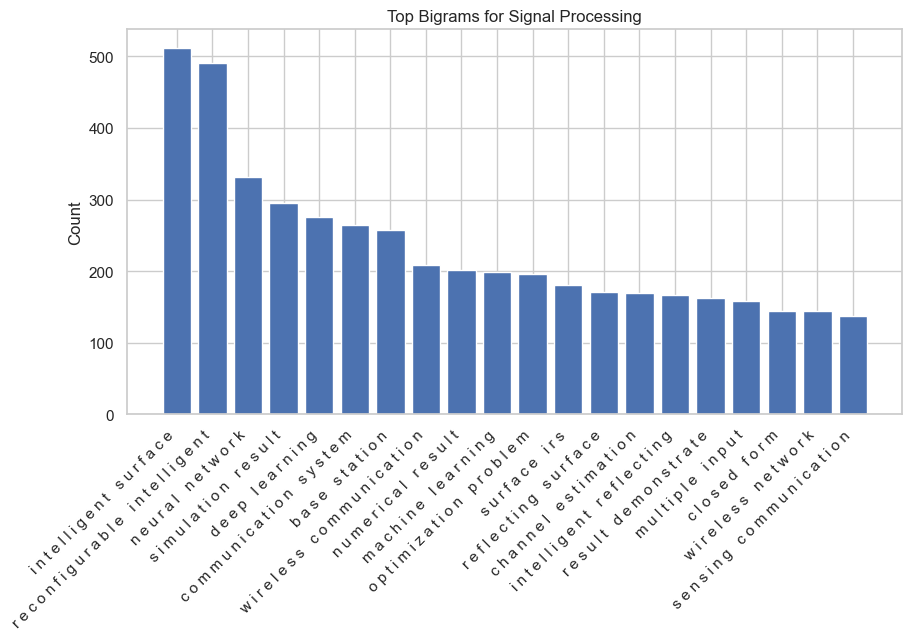

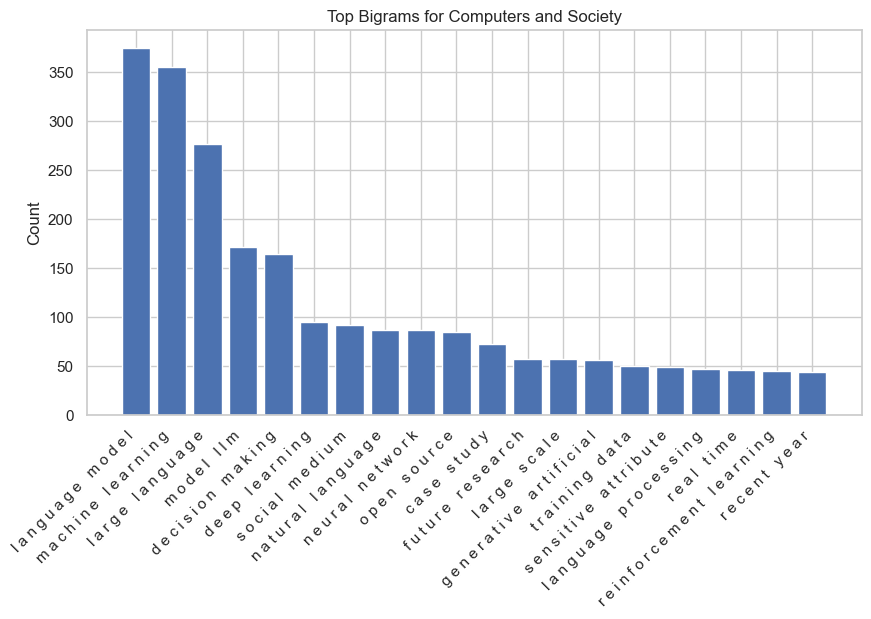

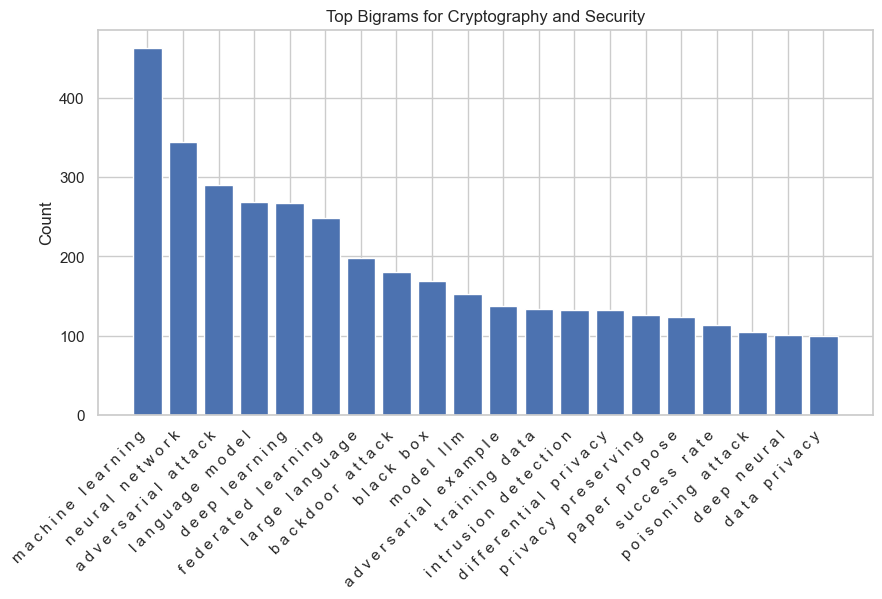

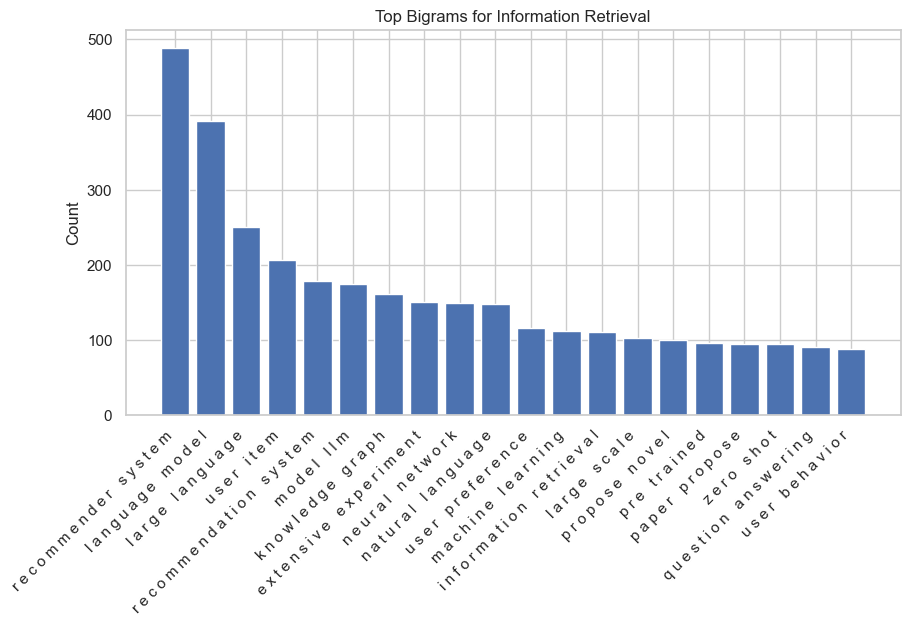

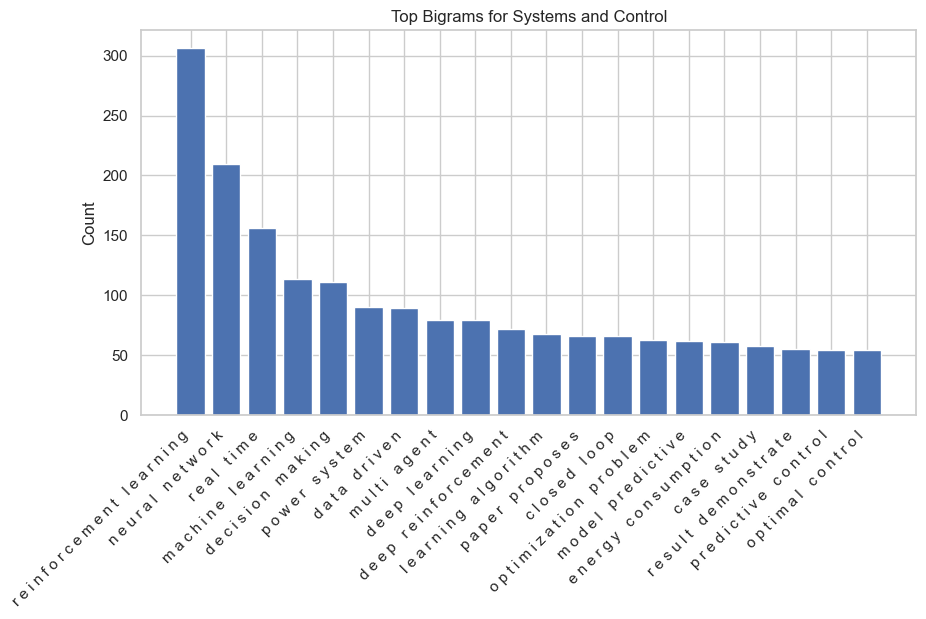

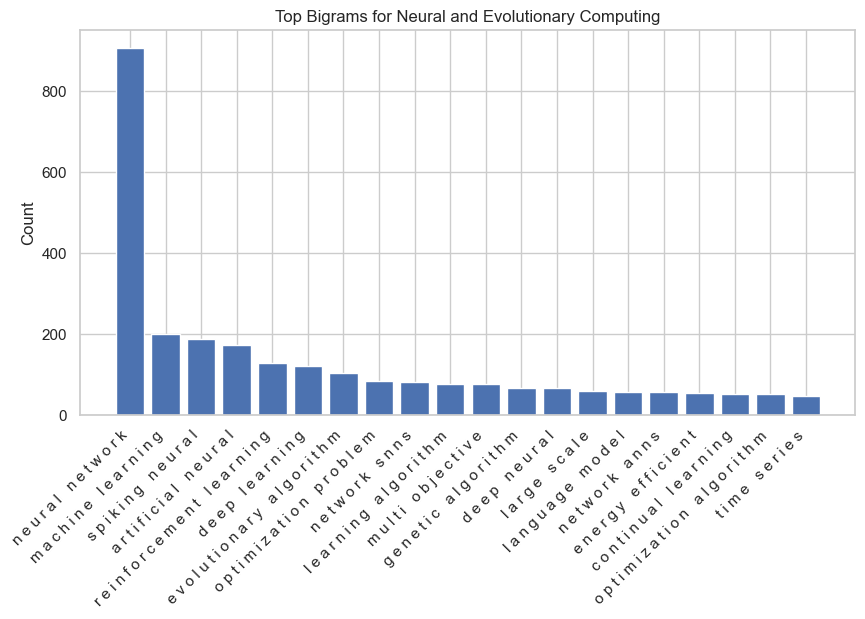

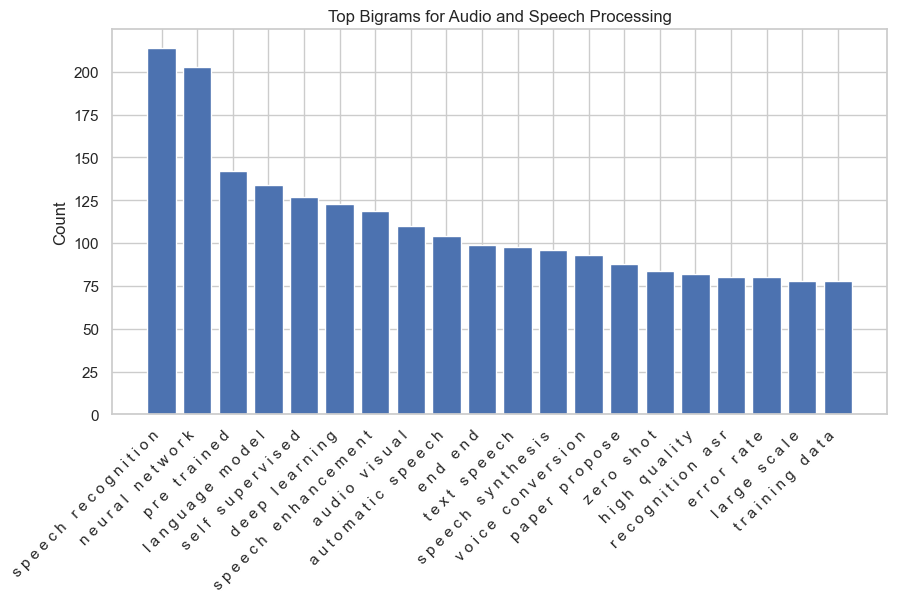

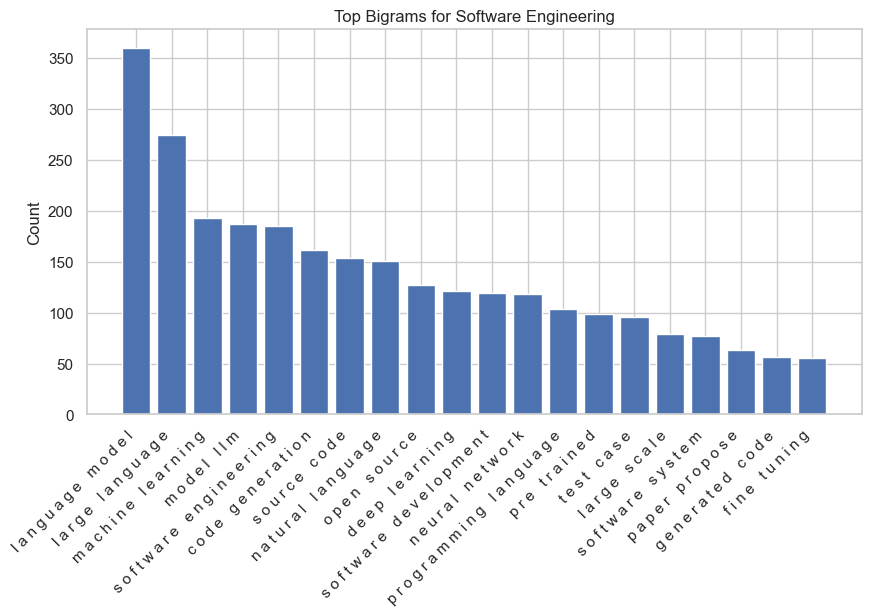

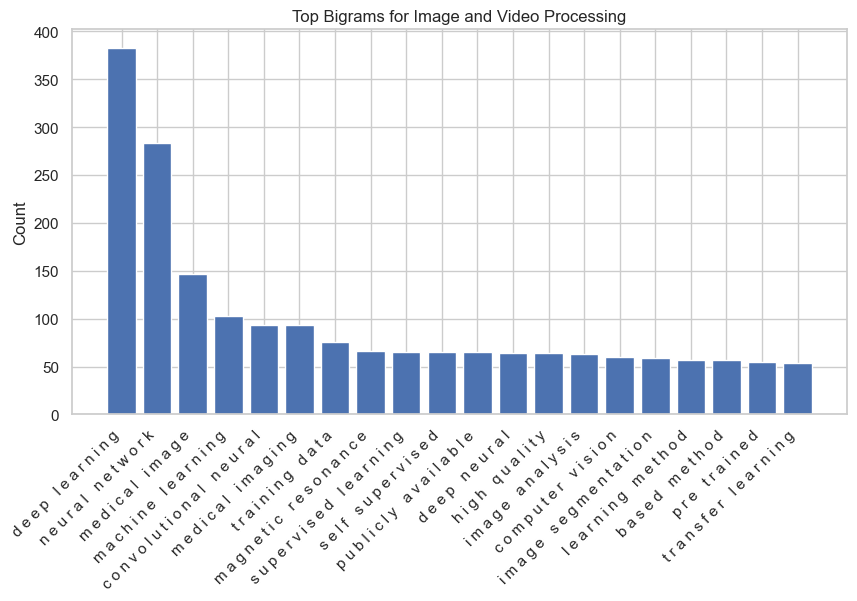

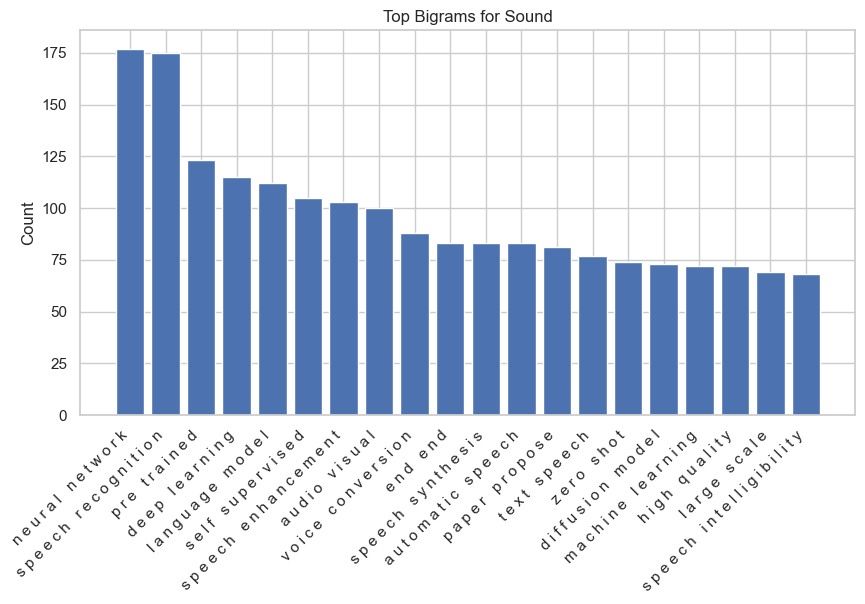

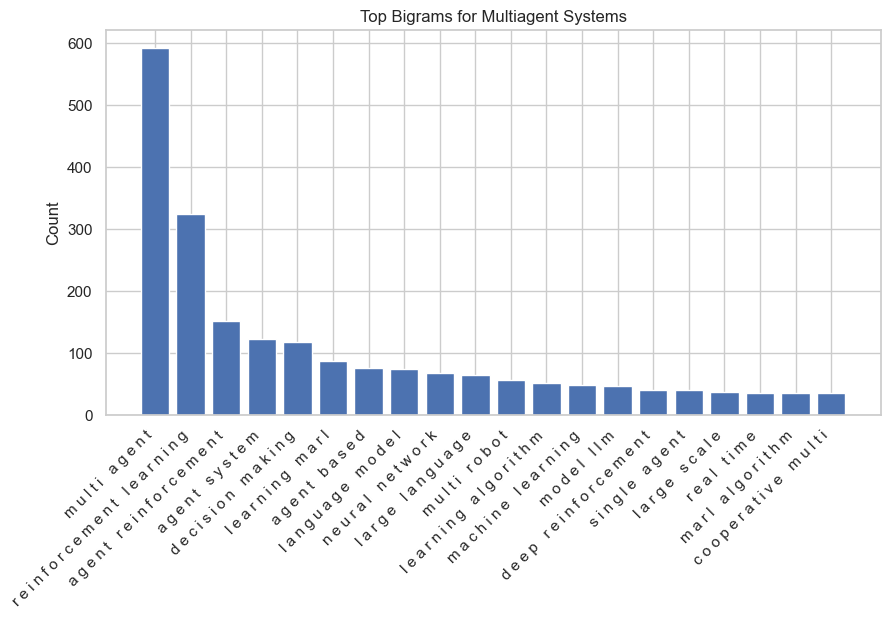

In [219]:
## Visualise the bigrams

bigrams_list = []

# Loop through each category
for category in category_df['category']:
    papers = df[df['categories'].str.contains(category)]
    papers['bigrams'] = papers['abstract'].apply(clean_and_2gram)
    bigram_list = [bigram for sublist in papers['bigrams'].tolist() for bigram in sublist]
    bigram_counts = Counter(bigram_list).most_common(20)
    
    for bigram, count in bigram_counts:
        bigrams_list.append({'category': category, 'bigram': ' '.join(bigram), 'count': count})

# Create a DataFrame from the list of bigrams
bigrams_df = pd.DataFrame(bigrams_list)

# Plot the bigrams
for category in bigrams_df['category'].unique():
    plt.figure(figsize=(10,5))
    category_bigrams = bigrams_df[bigrams_df['category'] == category].sort_values(by='count', ascending=False)
    plt.bar(category_bigrams['bigram'], category_bigrams['count'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top Bigrams for {category}')
    plt.ylabel('Count')
    plt.show()

# TF-IDF score of bigrams

In [220]:
# Tokenization
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams

# Tokenize the abstracts and titles
token_abs = [word_tokenize(abstract) for abstract in df['abstract']]
token_title = [word_tokenize(title) for title in df['title']]

token = [abstract + title for abstract, title in zip(token_abs, token_title)]

# Generate 2-grams 
bigram = [list(ngrams(token, 2,)) for token in token]
# Flatten the list of bigrams
bigram = [gram for sublist in bigram for gram in sublist]

# Convert each bigram tuple to a string
bigram = [' '.join(gram) for gram in bigram]
print(bigram[:10])

['value function', 'function central', 'central component', 'component deep', 'deep reinforcement', 'reinforcement learning', 'learning rl', 'rl function', 'function parameterized', 'parameterized neural']


In [221]:
# Create a frequency distribution of bigrams
bigram_freq = FreqDist(bigram)
bigram_freq.most_common(40)


[('language model', 11026),
 ('neural network', 10101),
 ('state art', 7625),
 ('large language', 6997),
 ('machine learning', 6168),
 ('real world', 5453),
 ('reinforcement learning', 5305),
 ('deep learning', 5193),
 ('artificial intelligence', 4515),
 ('model llm', 3522),
 ('e g', 3298),
 ('github com', 3026),
 ('natural language', 3020),
 ('http github', 2976),
 ('pre trained', 2823),
 ('experimental result', 2736),
 ('result show', 2577),
 ('fine tuning', 2566),
 ('learning model', 2562),
 ('large scale', 2541),
 ('decision making', 2302),
 ('paper propose', 2222),
 ('extensive experiment', 2205),
 ('propose novel', 2188),
 ('time series', 2048),
 ('proposed method', 1996),
 ('paper present', 1937),
 ('available http', 1912),
 ('training data', 1807),
 ('diffusion model', 1757),
 ('real time', 1729),
 ('zero shot', 1723),
 ('knowledge graph', 1593),
 ('learning based', 1569),
 ('intelligence ai', 1564),
 ('federated learning', 1561),
 ('result demonstrate', 1553),
 ('deep neural',

In [222]:
combined_text = df['title'] + ' ' + df['abstract']

In [223]:
# add combined_text to the DataFrame
df['combined_text'] = combined_text
df.head(5)

,date,title,abstract,categories,year,month,day,tokens,2grams,combined_text
0,2024-03-06,stop regressing training value function via cl...,value function central component deep reinforc...,"Machine Learning, Artificial Intelligence, Mac...",2024,3,6,"[stop, regress, training, value, function, cla...","[value function, function central, central com...",stop regressing training value function via cl...
1,2024-03-06,reconciling reality simulation real sim real a...,imitation learning method need significant hum...,"Robotics, Artificial Intelligence, Machine Lea...",2024,3,6,"[reconcile, reality, simulation, real, sim, re...","[imitation learning, learning method, method n...",reconciling reality simulation real sim real a...
2,2024-03-06,demographic dynamic artificial intelligence ch...,paper explores complex relationship demographi...,"Computers and Society, K.4",2024,3,6,"[demographic, dynamic, challenge, opportunity,...","[paper explores, explores complex, complex rel...",demographic dynamic artificial intelligence ch...
3,2024-03-06,extreme precipitation nowcasting using transfo...,paper present innovative approach extreme prec...,"Machine Learning, Artificial Intelligence",2024,3,6,"[extreme, precipitation, nowcasting, transform...","[present innovative, innovative approach, appr...",extreme precipitation nowcasting using transfo...
4,2024-03-06,consciousness qua mortal computation,computational functionalism posit consciousnes...,"q-bio.NC, Artificial Intelligence",2024,3,6,"[consciousness, mortal, computation]","[computational functionalism, functionalism po...",consciousness qua mortal computation computati...


In [224]:
bigram_tfidf = TfidfVectorizer(ngram_range=(2, 2))

# Fit and transform the vectorizer
bigram_matrix = bigram_tfidf.fit_transform(combined_text)

# Sum the bigram TF-IDF scores for each bigram across all documents
bigram_sums = np.sum(bigram_matrix, axis=0).A1
bigram_keyword = bigram_tfidf.get_feature_names_out()
bigram_keywords_df = pd.DataFrame({'bigram': bigram_keyword, 'tfidf': bigram_sums})
bigram_keywords_df = bigram_keywords_df.sort_values(by="tfidf", ascending=False)
print(bigram_keywords_df.head(40))


                          bigram       tfidf
938180            language model  276.413549
1118884           neural network  251.347610
939680            large language  193.143492
1587166                state art  175.687051
999221          machine learning  173.200759
1389805   reinforcement learning  166.099887
432131             deep learning  153.492356
1362058               real world  147.045407
144628   artificial intelligence  130.589206
1071606                model llm  105.861700
1103768         natural language  103.006107
1264747              pre trained   97.151067
679402               fine tuning   93.141397
747098                github com   90.983984
800541               http github   89.806205
955735            learning model   88.183454
1690252              time series   87.184750
630703       experimental result   84.632596
427858           decision making   83.499644
939976               large scale   82.805801
1429689              result show   81.081426
486052    

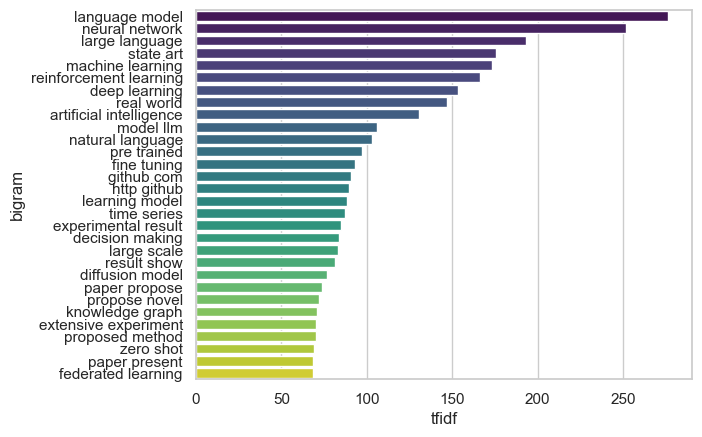

<Figure size 1000x800 with 0 Axes>

In [225]:
# Plot the top 20 bigrams by TF-IDF score
sns.barplot(x='tfidf', y='bigram', data=bigram_keywords_df.head(30), palette='viridis')
plt.figure(figsize=(10, 8))
plt.show()

In [226]:
bigram_keywords_df.head(20)

,bigram,tfidf
938180,language model,276.413549
1118884,neural network,251.347610
939680,large language,193.143492
1587166,state art,175.687051
999221,machine learning,173.200759
1389805,reinforcement learning,166.099887
432131,deep learning,153.492356
1362058,real world,147.045407
144628,artificial intelligence,130.589206
1071606,model llm,105.861700
